# Wave Equation  
reference:   
波動方程式の数値解法 - Quiita  
https://qiita.com/kohga/items/dccf135b0af395f69144

このコードは、以下の主なステップを実行します。

WaveSolver クラスの定義: 波動方程式を解くためのクラスを定義します。_u_cur は現在の波の高さ、_u_new は新しい波の高さ、_u_pre は前の時刻の波の高さを表します。

reset メソッド: 初期条件を設定します。2つのガウス分布を合成して波の初期状態を生成します。

step メソッド: 波のシミュレーションを1ステップ進めます。差分法を用いて波動方程式を離散化し、新しい波の高さ _u_new を計算します。

WaveSolver インスタンスの作成とシミュレーションループ: WaveSolver クラスのインスタンスを作成し、300回のシミュレーションステップを実行します。

可視化: シミュレーション結果を可視化します。オリジナルの波の高さと平滑化された波の高さを並べて表示します。

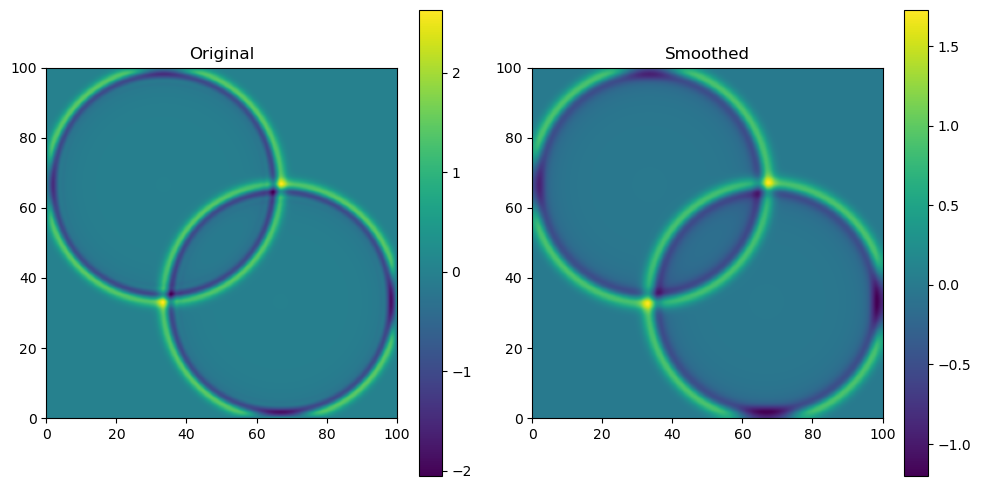

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 波動方程式を解くWaveSolverクラスの定義
class WaveSolver:
    def __init__(self):
        self.kWaveGrid = 300  # グリッドのサイズ
        self.kWaveWidth = 100  # 波の幅
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 現在の波の高さ
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 新しい波の高さ
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 前の時刻の波の高さ
        self.reset()  # 初期化

    def reset(self):
        # ガウス関数を定義
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        # グリッド上の各位置における波の高さを初期化
        for x in range(1, self.kWaveGrid - 1):
            for y in range(1, self.kWaveGrid - 1):
                # 2つのガウス分布に基づいて波の高さを設定
                norm1 = np.linalg.norm(np.array([x, y]) - np.array([cx1, cy1]))
                value1 = gauss(norm1, 3.0) * 20.0

                norm2 = np.linalg.norm(np.array([x, y]) - np.array([cx2, cy2]))
                value2 = gauss(norm2, 3.0) * 20.0

                self._u_cur[x, y] = value1 + value2

        # 前の時刻と新しい波の高さを現在の波の高さで初期化
        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)

        # グリッド上の各位置における新しい波の高さを計算
        # 境界条件は初期値のまま0とする（for文から除外）
        for x in range(1, self.kWaveGrid - 1):
            for y in range(1, self.kWaveGrid - 1):
                uL = self._u_cur[x - 1, y]
                uR = self._u_cur[x + 1, y]
                uT = self._u_cur[x, y - 1]
                uB = self._u_cur[x, y + 1]

                u_pre = self._u_pre[x, y]
                u = self._u_cur[x, y]
                # 波動方程式の差分法による更新
                self._u_new[x, y] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB)

        # 前の時刻、現在の波の高さ、新しい波の高さを更新
        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# オリジナルと平滑化した波の高さを表示
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
plt.title('Original')  # オリジナルの波の高さの表示
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
plt.title('Smoothed')  # 平滑化した波の高さの表示
plt.colorbar()

plt.tight_layout()
plt.show()


def reset()  
この部分は、2つの中心点(cx1, cy1)と(cx2, cy2)からの距離を計算し、それぞれの距離に対してガウス関数を適用して波の初期状態を設定しています。

具体的には、以下の手順を実行しています：

1. `np.array([x, y]) - np.array([cx1, cy1])`：現在の位置 (x, y) と中心点(cx1, cy1) との距離を計算します。
2. `np.linalg.norm(...)`：上記で計算した距離ベクトルのノルム（長さ）を計算します。これにより、中心点(cx1, cy1) からの距離が求まります。同様にして、中心点(cx2, cy2) からの距離も計算します。
3. `gauss(norm1, 3.0) * 20.0` および `gauss(norm2, 3.0) * 20.0`：計算した距離に対してガウス関数を適用して波の高さを計算します。ガウス関数は、距離が遠いほど小さくなり、距離が近いほど大きくなる性質を持ちます。そして、これに係数 20.0 を乗じて初期波の高さを決定しています。

これにより、中心点(cx1, cy1) と (cx2, cy2) を中心とする2つのガウス分布を合成して波の初期状態を生成しています。

## アニメーション生成

高速化前　遅い

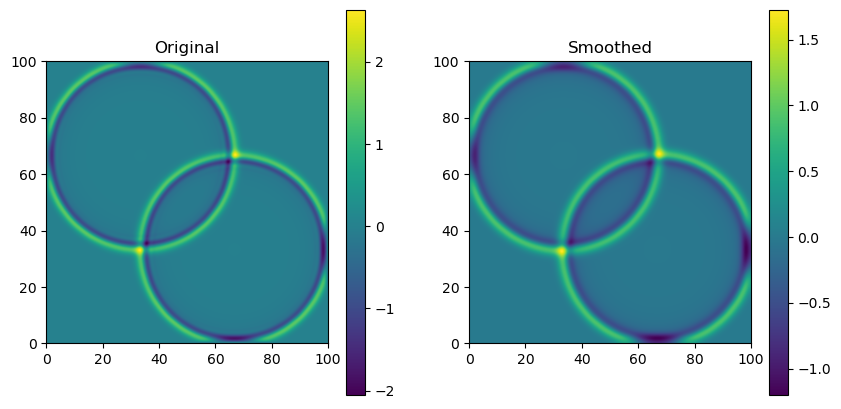

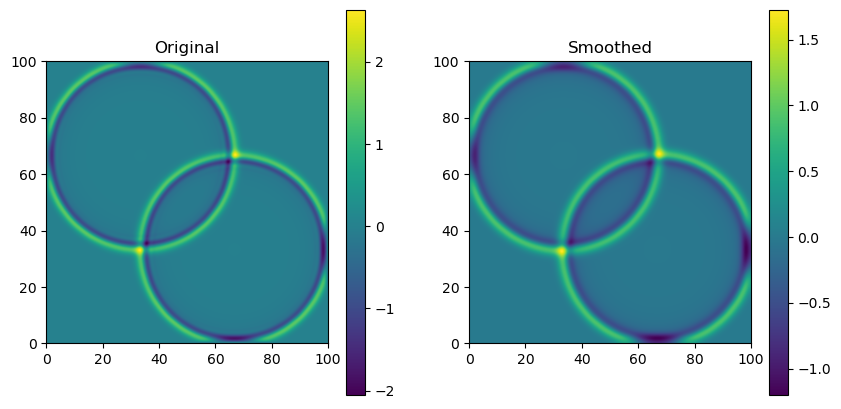

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# オリジナルと平滑化した波の高さを表示
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im2 = axs[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs[0].set_title('Original')
axs[1].set_title('Smoothed')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

def update_plot(num, im, wave_solver):
    for i in range(10):  # 10ステップ分更新
        wave_solver.step()
    smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)
    im[0].set_array(wave_solver._u_cur)
    im[1].set_array(smoothed_image)
    return im

fig_anim, axs_anim = plt.subplots(1, 2, figsize=(10, 5))
im_anim1 = axs_anim[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im_anim2 = axs_anim[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs_anim[0].set_title('Original')
axs_anim[1].set_title('Smoothed')
fig_anim.colorbar(im_anim1, ax=axs_anim[0])
fig_anim.colorbar(im_anim2, ax=axs_anim[1])

ani = animation.FuncAnimation(fig_anim, update_plot, frames=100, fargs=[(im_anim1, im_anim2), wave_solver], interval=100)
plt.show()


In [15]:
from IPython.display import HTML

HTML(ani.to_html5_video())

高速化させるためのプロンプト

In [ ]:
以下の”参考にするコード”を参考にして”修正するコード”を修正して，処理を高速化してください．
一般に，Pythonの処理はfor文を使うと遅くなります．
参考にするコードではスライスを使っています．


修正するコード：
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 波動方程式を解くWaveSolverクラスの定義
class WaveSolver:
    def __init__(self):
        self.kWaveGrid = 300  # グリッドのサイズ
        self.kWaveWidth = 100  # 波の幅
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 現在の波の高さ
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 新しい波の高さ
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 前の時刻の波の高さ
        self.reset()  # 初期化

    def reset(self):
        # ガウス関数を定義
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        # グリッド上の各位置における波の高さを初期化
        for x in range(1, self.kWaveGrid - 1):
            for y in range(1, self.kWaveGrid - 1):
                # 2つのガウス分布に基づいて波の高さを設定
                norm1 = np.linalg.norm(np.array([x, y]) - np.array([cx1, cy1]))
                value1 = gauss(norm1, 3.0) * 20.0

                norm2 = np.linalg.norm(np.array([x, y]) - np.array([cx2, cy2]))
                value2 = gauss(norm2, 3.0) * 20.0

                self._u_cur[x, y] = value1 + value2

        # 前の時刻と新しい波の高さを現在の波の高さで初期化
        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)

        # グリッド上の各位置における新しい波の高さを計算
        # 境界条件は初期値のまま0とする（for文から除外）
        for x in range(1, self.kWaveGrid - 1):
            for y in range(1, self.kWaveGrid - 1):
                uL = self._u_cur[x - 1, y]
                uR = self._u_cur[x + 1, y]
                uT = self._u_cur[x, y - 1]
                uB = self._u_cur[x, y + 1]

                u_pre = self._u_pre[x, y]
                u = self._u_cur[x, y]
                # 波動方程式の差分法による更新
                self._u_new[x, y] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB)

        # 前の時刻、現在の波の高さ、新しい波の高さを更新
        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# オリジナルと平滑化した波の高さを表示
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
plt.title('Original')  # オリジナルの波の高さの表示
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
plt.title('Smoothed')  # 平滑化した波の高さの表示
plt.colorbar()

plt.tight_layout()
plt.show()


参考にするコード：
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

# 条件設定
nx = 31
ny = 31
nt = 17
nu = 0.05
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.25
dt = sigma * dx * dy / nu

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

# 初期状態
u = np.ones((ny, nx))
un = np.ones((ny, nx))
uinit = 2
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2


def diffuse(nt):
    global surf, u
    un = u.copy()
    u[1:-1, 1:-1] = (un[1:-1, 1:-1] +
                    nu * dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                    nu * dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

    ax.clear()
    ax.set_zlim(1, 2.5)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('time = '+ str(round(nt*dt,2))+ 'sec, '+ str(nt)+'step')
    surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)


fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(x, y)
# surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)

ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# 動画出力
ani = animation.FuncAnimation(fig, diffuse, interval=100, frames=50)

# 動画保存
ani.save('DiffuseEq' + '_nt=' + str(nt) + '_dt=' + str(round(dt,2)) + '_u,v=' + str(uinit) + '_sigma=' + str(sigma) + '.mp4', writer='ffmpeg', fps=30)

HTML(ani.to_html5_video())

## スライス処理に修正して高速化

/Users/taku/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


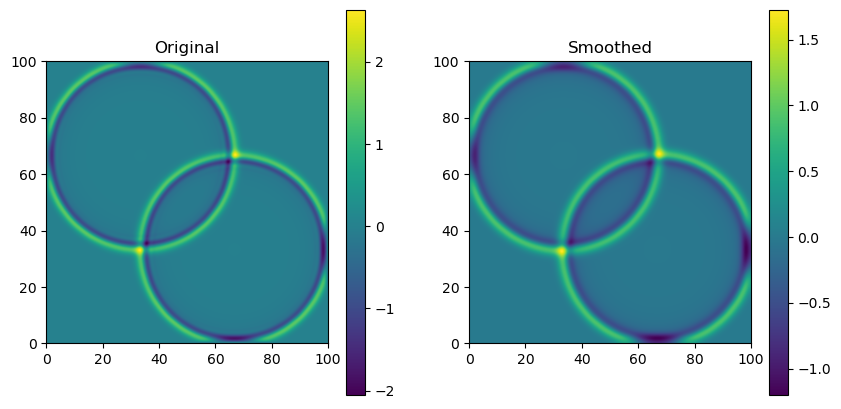

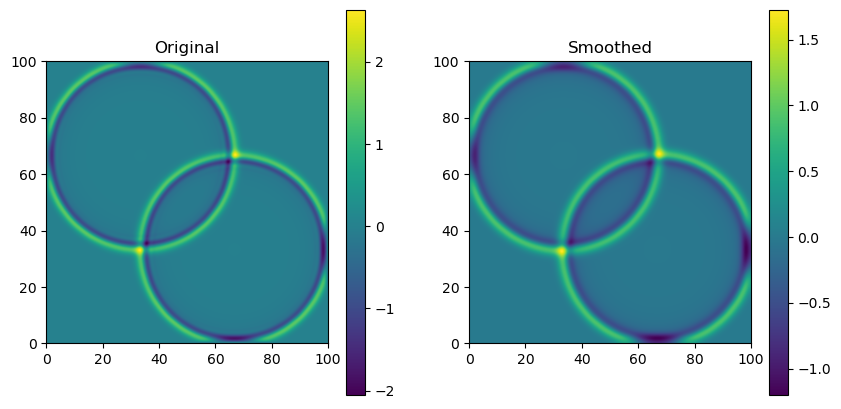

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter
from IPython.display import HTML


# 波動方程式を解くWaveSolverクラスの定義
class WaveSolver:
    def __init__(self):
        self.kWaveGrid = 300  # グリッドのサイズ
        self.kWaveWidth = 100  # 波の幅
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 現在の波の高さ
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 新しい波の高さ
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 前の時刻の波の高さ
        self.reset()  # 初期化

    def reset(self):
        # ガウス関数を定義
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        # グリッド上の各位置における波の高さを初期化
        x = np.arange(1, self.kWaveGrid - 1)
        y = np.arange(1, self.kWaveGrid - 1)
        X, Y = np.meshgrid(x, y)
        norm1 = np.linalg.norm(np.stack([X - cx1, Y - cy1], axis=-1), axis=-1)
        norm2 = np.linalg.norm(np.stack([X - cx2, Y - cy2], axis=-1), axis=-1)
        value1 = gauss(norm1, 3.0) * 20.0
        value2 = gauss(norm2, 3.0) * 20.0
        self._u_cur[1:-1, 1:-1] = value1 + value2

        # 前の時刻と新しい波の高さを現在の波の高さで初期化
        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)

        # 波動方程式の差分法による更新
        uL = self._u_cur[:-2, 1:-1]
        uR = self._u_cur[2:, 1:-1]
        uT = self._u_cur[1:-1, :-2]
        uB = self._u_cur[1:-1, 2:]

        u_pre = self._u_pre[1:-1, 1:-1]
        u = self._u_cur[1:-1, 1:-1]
        self._u_new[1:-1, 1:-1] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB)

        # 前の時刻、現在の波の高さ、新しい波の高さを更新
        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# オリジナルと平滑化した波の高さを表示
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im2 = axs[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs[0].set_title('Original')
axs[1].set_title('Smoothed')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

def update_plot(num, im, wave_solver):
    for i in range(10):  # 10ステップ分更新
        wave_solver.step()
    smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)
    im[0].set_array(wave_solver._u_cur)
    im[1].set_array(smoothed_image)
    return im

fig_anim, axs_anim = plt.subplots(1, 2, figsize=(10, 5))
im_anim1 = axs_anim[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im_anim2 = axs_anim[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs_anim[0].set_title('Original')
axs_anim[1].set_title('Smoothed')
fig_anim.colorbar(im_anim1, ax=axs_anim[0])
fig_anim.colorbar(im_anim2, ax=axs_anim[1])

ani = animation.FuncAnimation(fig_anim, update_plot, frames=100, fargs=[(im_anim1, im_anim2), wave_solver], interval=100)

# 動画保存
# ani.save('WaveSimulation.mp4', writer='ffmpeg', fps=30)

plt.show()



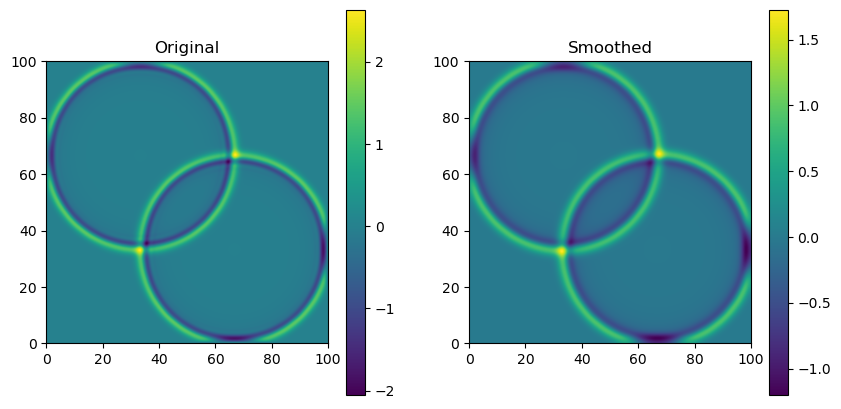

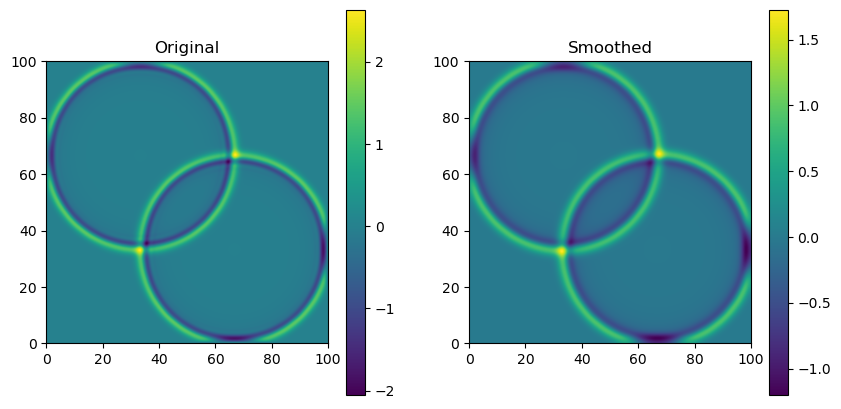

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter
from IPython.display import HTML


# 波動方程式を解くWaveSolverクラスの定義
class WaveSolver:
    def __init__(self):
        self.kWaveGrid = 300  # グリッドのサイズ
        self.kWaveWidth = 100  # 波の幅
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 現在の波の高さ
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 新しい波の高さ
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 前の時刻の波の高さ
        self.reset()  # 初期化

    def reset(self):
        # ガウス関数を定義
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        # グリッド上の各位置における波の高さを初期化
        x = np.arange(1, self.kWaveGrid - 1)
        y = np.arange(1, self.kWaveGrid - 1)
        X, Y = np.meshgrid(x, y)
        norm1 = np.linalg.norm(np.stack([X - cx1, Y - cy1], axis=-1), axis=-1)
        norm2 = np.linalg.norm(np.stack([X - cx2, Y - cy2], axis=-1), axis=-1)
        value1 = gauss(norm1, 3.0) * 20.0
        value2 = gauss(norm2, 3.0) * 20.0
        self._u_cur[1:-1, 1:-1] = value1 + value2

        # 前の時刻と新しい波の高さを現在の波の高さで初期化
        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)

        # 波動方程式の差分法による更新
        uL = self._u_cur[:-2, 1:-1]
        uR = self._u_cur[2:, 1:-1]
        uT = self._u_cur[1:-1, :-2]
        uB = self._u_cur[1:-1, 2:]

        u_pre = self._u_pre[1:-1, 1:-1]
        u = self._u_cur[1:-1, 1:-1]
        self._u_new[1:-1, 1:-1] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB)

        # 前の時刻、現在の波の高さ、新しい波の高さを更新
        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# オリジナルと平滑化した波の高さを表示
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im2 = axs[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs[0].set_title('Original')
axs[1].set_title('Smoothed')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

def update_plot(num, im, wave_solver):
    for i in range(10):  # 10ステップ分更新
        wave_solver.step()
    smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)
    im[0].set_array(wave_solver._u_cur)
    im[1].set_array(smoothed_image)
    return im

fig_anim, axs_anim = plt.subplots(1, 2, figsize=(10, 5))
im_anim1 = axs_anim[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im_anim2 = axs_anim[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs_anim[0].set_title('Original')
axs_anim[1].set_title('Smoothed')
fig_anim.colorbar(im_anim1, ax=axs_anim[0])
fig_anim.colorbar(im_anim2, ax=axs_anim[1])

# アニメーションの作成
ani = animation.FuncAnimation(fig_anim, update_plot, frames=500, fargs=[(im_anim1, im_anim2), wave_solver], interval=20)
# frame：フレーム数　動画の尺を決める
# interval：更新間隔　単位はms　動画の滑らかさを決める　大きくなると遅くなる

# 動画保存
# ani.save('WaveSimulation.mp4', writer='ffmpeg', fps=30)

plt.show()



In [41]:
from IPython.display import HTML

HTML(ani.to_html5_video())

Future Work
- 3Dプロット
- ~~波の減衰~~ 8/9 できた
- for文とスライスで実行時間の違い比較
- matlabで実装　行列式で離散化　https://takun-physics.net/9346/
- x，y方向に速度uとv　つまり　進行速度の異方性？
- 3Dモデルにプロット　blender


## 減衰項あり






md記法の練習
$$
    % \begin{hoge}...\end{hoge} と書くことで幾つかの文章様式が表現可能 (texでは環境と呼ぶようです)
    % align環境を使うと複数の式を&で位置合わせできる
    \begin{align}
        % 奇数番目の&で場所が縦に揃う
        % 偶数番目の&はタブスペースになる
        % \tag で式に番号が振ることも出来る
        a_1   &= ax_1 & a_2   &= ax_2  \tag{1} \\
        bb_1  &= ax_1 & bb_2  &= ax_2  \tag{2} \\        
        ccc_1 &= ax_1 & ccc_2 &= ax_2
    \end{align}
$$


### 定式化
減衰係数　_k_ として速度の時間微分に比例するように与える

$$

\frac { { \partial  }^{ 2 }u(x,y,t) }{ { \partial  }{ t }^{ 2 } } ={ c }^{ 2 }(\frac { { \partial  }^{ 2 }u(x,y,t) }{ { \partial  }{ x }^{ 2 } } +\frac { { \partial  }^{ 2 }u(x,y,t) }{ { \partial  }y^{ 2 } } )-k\frac { { \partial  }u(x,y,t) }  { { \partial  }t }  \\
\quad \\
\frac { { \partial  }^{ 2 }u(x,y,t) }{ { \partial  }{ t }^{ 2 } } =\frac { { c }^{ 2 } }{ { ⊿x }^{ 2 } } \left\{ u(x-⊿x,y,t)+u(x+⊿x,y,t)+u(x,y-⊿x,t)+u(x,y+⊿x,t)-4u(x,y,t) \right\} -k\frac { { \partial  }u(x,y,t) }{ { \partial  }t } \\ 
\quad \\
\frac { u(x,y,t-⊿t)-2u(x,y,t)+u(x,y,t+⊿t) }{ { ⊿t }^{ 2 } } =\frac { { c }^{ 2 } }{ { ⊿x }^{ 2 } } \left\{ u(x-⊿x,y,t)+u(x+⊿x,y,t)+u(x,y-⊿x,t)+u(x,y+⊿x,t)-4u(x,y,t) \right\} -k\frac { u(x,y,t)-u(x,y,t-⊿t) }{ ⊿t } \\ 
\quad \\
u(x,y,t-⊿t)-2u(x,y,t)+u(x,y,t+⊿t)=\frac { { { ⊿t }^{ 2 }c }^{ 2 } }{ { ⊿x }^{ 2 } } \left\{ u(x-⊿x,y,t)+u(x+⊿x,y,t)+u(x,y-⊿x,t)+u(x,y+⊿x,t)-4u(x,y,t) \right\} -k⊿t\{ u(x,y,t)-u(x,y,t-⊿t)\} \\ 
\quad \\
u(x,y,t+⊿t)=2u(x,y,t)-u(x,y,t-⊿t)+\frac { { { ⊿t }^{ 2 }c }^{ 2 } }{ { ⊿x }^{ 2 } } \left\{ u(x-⊿x,y,t)+u(x+⊿x,y,t)+u(x,y-⊿x,t)+u(x,y+⊿x,t)-4u(x,y,t) \right\} -k⊿t\{ u(x,y,t)-u(x,y,t-⊿t)\} 

$$

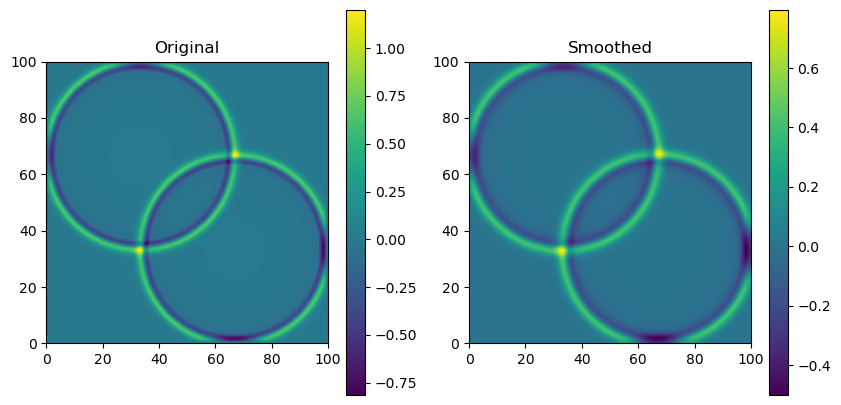

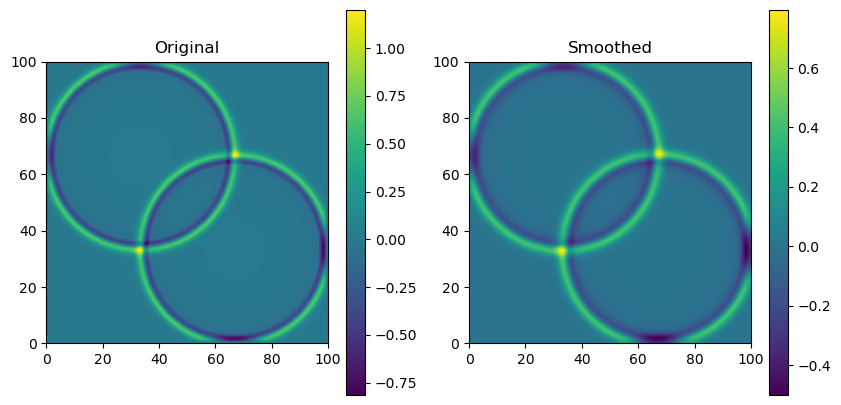

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter
from IPython.display import HTML

# 波動方程式を解くWaveSolverクラスの定義
class WaveSolver_2:
    def __init__(self):
        self.kWaveGrid = 300  # グリッドのサイズ
        self.kWaveWidth = 100  # 波の幅
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 現在の波の高さ
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 新しい波の高さ
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 前の時刻の波の高さ
        self.reset()  # 初期化
        
    def reset(self):
        # ガウス関数を定義
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        # グリッド上の各位置における波の高さを初期化
        x = np.arange(1, self.kWaveGrid - 1)
        y = np.arange(1, self.kWaveGrid - 1)
        X, Y = np.meshgrid(x, y)
        norm1 = np.linalg.norm(np.stack([X - cx1, Y - cy1], axis=-1), axis=-1)
        norm2 = np.linalg.norm(np.stack([X - cx2, Y - cy2], axis=-1), axis=-1)
        value1 = gauss(norm1, 3.0) * 20.0
        value2 = gauss(norm2, 3.0) * 20.0
        self._u_cur[1:-1, 1:-1] = value1 + value2

        # 前の時刻と新しい波の高さを現在の波の高さで初期化
        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)
        k = 0.1

        # 波動方程式の差分法による更新
        uL = self._u_cur[:-2, 1:-1]
        uR = self._u_cur[2:, 1:-1]
        uT = self._u_cur[1:-1, :-2]
        uB = self._u_cur[1:-1, 2:]

        u_pre = self._u_pre[1:-1, 1:-1]
        u = self._u_cur[1:-1, 1:-1]
        damp = -k * deltaT *(u - u_pre)

        # self._u_new[1:-1, 1:-1] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB)
        self._u_new[1:-1, 1:-1] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB) + damp

        # 前の時刻、現在の波の高さ、新しい波の高さを更新
        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver_2()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# オリジナルと平滑化した波の高さを表示
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im2 = axs[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs[0].set_title('Original')
axs[1].set_title('Smoothed')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

def update_plot(num, im, wave_solver):
    for i in range(10):  # 10ステップ分更新
        wave_solver.step()
    smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)
    im[0].set_array(wave_solver._u_cur)
    im[1].set_array(smoothed_image)
    return im

fig_anim, axs_anim = plt.subplots(1, 2, figsize=(10, 5))
im_anim1 = axs_anim[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im_anim2 = axs_anim[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs_anim[0].set_title('Original')
axs_anim[1].set_title('Smoothed')
fig_anim.colorbar(im_anim1, ax=axs_anim[0])
fig_anim.colorbar(im_anim2, ax=axs_anim[1])

# アニメーションの作成
ani = animation.FuncAnimation(fig_anim, update_plot, frames=500, fargs=[(im_anim1, im_anim2), wave_solver], interval=20)
# frame：フレーム数　動画の尺を決める
# interval：更新間隔　単位はms　動画の滑らかさを決める　大きくなると遅くなる

# 動画保存
# ani.save('WaveSimulation_decay.mp4', writer='ffmpeg', fps=30)

plt.show()



In [12]:
from IPython.display import HTML

HTML(ani.to_html5_video())

以下の”修正するコード”を”参考にするコード”を参考にしてプロットの形式を3Dに修正してください．
また，プロットに時刻とステップ数が表示されるように機能を追加して下さい


修正するコード：
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter
from IPython.display import HTML

# 波動方程式を解くWaveSolverクラスの定義
class WaveSolver_2:
    def __init__(self):
        self.kWaveGrid = 300  # グリッドのサイズ
        self.kWaveWidth = 100  # 波の幅
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 現在の波の高さ
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 新しい波の高さ
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 前の時刻の波の高さ
        self.reset()  # 初期化
        
    def reset(self):
        # ガウス関数を定義
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        # グリッド上の各位置における波の高さを初期化
        x = np.arange(1, self.kWaveGrid - 1)
        y = np.arange(1, self.kWaveGrid - 1)
        X, Y = np.meshgrid(x, y)
        norm1 = np.linalg.norm(np.stack([X - cx1, Y - cy1], axis=-1), axis=-1)
        norm2 = np.linalg.norm(np.stack([X - cx2, Y - cy2], axis=-1), axis=-1)
        value1 = gauss(norm1, 3.0) * 20.0
        value2 = gauss(norm2, 3.0) * 20.0
        self._u_cur[1:-1, 1:-1] = value1 + value2

        # 前の時刻と新しい波の高さを現在の波の高さで初期化
        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)
        k = 0.1

        # 波動方程式の差分法による更新
        uL = self._u_cur[:-2, 1:-1]
        uR = self._u_cur[2:, 1:-1]
        uT = self._u_cur[1:-1, :-2]
        uB = self._u_cur[1:-1, 2:]

        u_pre = self._u_pre[1:-1, 1:-1]
        u = self._u_cur[1:-1, 1:-1]
        damp = -k * deltaT *(u - u_pre)

        # self._u_new[1:-1, 1:-1] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB)
        self._u_new[1:-1, 1:-1] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB) + damp

        # 前の時刻、現在の波の高さ、新しい波の高さを更新
        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver_2()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# オリジナルと平滑化した波の高さを表示
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im2 = axs[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs[0].set_title('Original')
axs[1].set_title('Smoothed')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

def update_plot(num, im, wave_solver):
    for i in range(10):  # 10ステップ分更新
        wave_solver.step()
    smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)
    im[0].set_array(wave_solver._u_cur)
    im[1].set_array(smoothed_image)
    return im

fig_anim, axs_anim = plt.subplots(1, 2, figsize=(10, 5))
im_anim1 = axs_anim[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im_anim2 = axs_anim[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs_anim[0].set_title('Original')
axs_anim[1].set_title('Smoothed')
fig_anim.colorbar(im_anim1, ax=axs_anim[0])
fig_anim.colorbar(im_anim2, ax=axs_anim[1])

# アニメーションの作成
ani = animation.FuncAnimation(fig_anim, update_plot, frames=500, fargs=[(im_anim1, im_anim2), wave_solver], interval=20)
# frame：フレーム数　動画の尺を決める
# interval：更新間隔　単位はms　動画の滑らかさを決める　大きくなると遅くなる

# 動画保存
# ani.save('WaveSimulation_decay.mp4', writer='ffmpeg', fps=30)

plt.show()



参考にするコード：

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.show()

プロットを3Dに変更

/Users/taku/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


TypeError: update_plot() takes 3 positional arguments but 5 were given

Error in callback <function _draw_all_if_interactive at 0x117b03100> (for post_execute):


TypeError: update_plot() takes 3 positional arguments but 5 were given

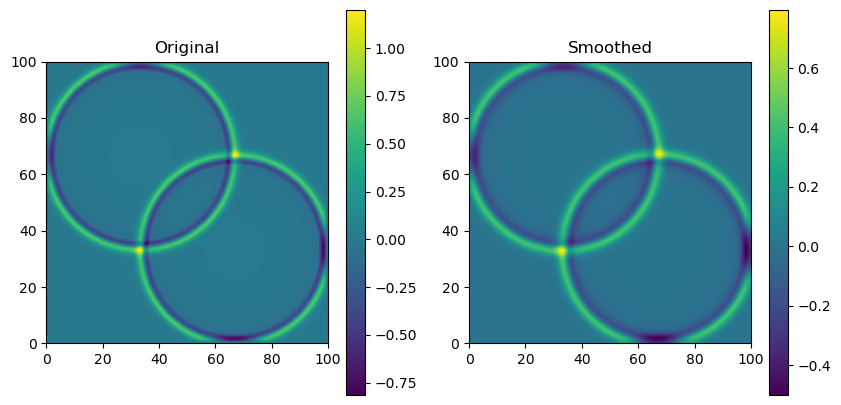

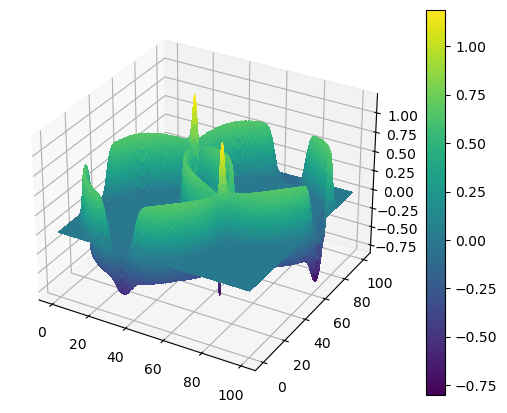

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.ndimage import gaussian_filter

# 波動方程式を解くWaveSolverクラスの定義
class WaveSolver_2:
    def __init__(self):
        self.kWaveGrid = 300  # グリッドのサイズ
        self.kWaveWidth = 100  # 波の幅
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 現在の波の高さ
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 新しい波の高さ
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 前の時刻の波の高さ
        self.reset()  # 初期化
        
    def reset(self):
        # ガウス関数を定義
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        # グリッド上の各位置における波の高さを初期化
        x = np.arange(1, self.kWaveGrid - 1)
        y = np.arange(1, self.kWaveGrid - 1)
        X, Y = np.meshgrid(x, y)
        norm1 = np.linalg.norm(np.stack([X - cx1, Y - cy1], axis=-1), axis=-1)
        norm2 = np.linalg.norm(np.stack([X - cx2, Y - cy2], axis=-1), axis=-1)
        value1 = gauss(norm1, 3.0) * 20.0
        value2 = gauss(norm2, 3.0) * 20.0
        self._u_cur[1:-1, 1:-1] = value1 + value2

        # 前の時刻と新しい波の高さを現在の波の高さで初期化
        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)
        k = 0.1

        # 波動方程式の差分法による更新
        uL = self._u_cur[:-2, 1:-1]
        uR = self._u_cur[2:, 1:-1]
        uT = self._u_cur[1:-1, :-2]
        uB = self._u_cur[1:-1, 2:]

        u_pre = self._u_pre[1:-1, 1:-1]
        u = self._u_cur[1:-1, 1:-1]
        damp = -k * deltaT *(u - u_pre)

        self._u_new[1:-1, 1:-1] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB) + damp

        # 前の時刻、現在の波の高さ、新しい波の高さを更新
        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver_2()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)

# オリジナルと平滑化した波の高さを表示
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im2 = axs[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs[0].set_title('Original')
axs[1].set_title('Smoothed')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

def update_plot(num, ax, wave_solver, X, Y):
    for i in range(10):  # 10ステップ分更新
        wave_solver.step()
    smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)
    ax.clear()
    surf = ax.plot_surface(X, Y, wave_solver._u_cur, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
    # ax.set_title('time = '+ str(round(num* deltaT ,3))+ 'sec, '+ str(num)+'step')
    return surf

def update_plot(num, im, wave_solver):
    for i in range(10):  # 10ステップ分更新
        wave_solver.step()
    smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)
    im[0].set_array(wave_solver._u_cur)
    im[1].set_array(smoothed_image)
    return im


fig_anim = plt.figure(figsize=(8, 5), dpi=100)
ax_anim = fig_anim.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.linspace(0, wave_solver.kWaveWidth, wave_solver.kWaveGrid),
                   np.linspace(0, wave_solver.kWaveWidth, wave_solver.kWaveGrid))
surf_anim = ax_anim.plot_surface(X, Y, wave_solver._u_cur, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
fig_anim.colorbar(surf_anim)
ani = animation.FuncAnimation(fig_anim, update_plot, frames=500, fargs=[ax_anim, wave_solver, X, Y], interval=20)

# 動画保存
ani.save('WaveSimulation_3D.mp4', writer='ffmpeg', fps=30)

plt.show()


In [20]:
HTML(ani.to_html5_video())

TypeError: update_plot() takes 3 positional arguments but 5 were given

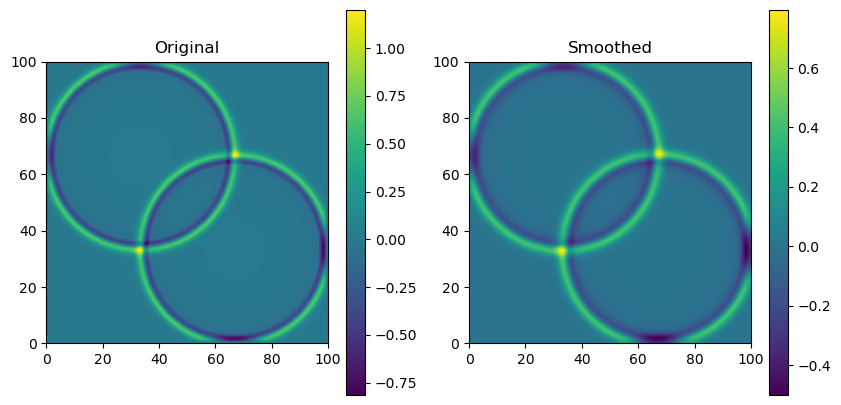

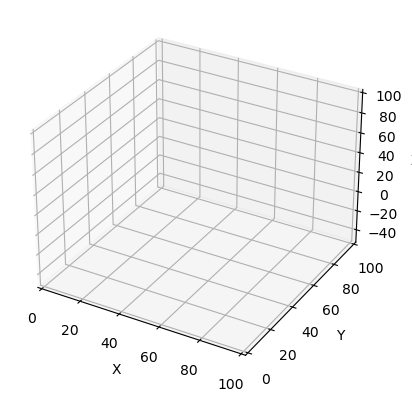

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.ndimage import gaussian_filter

# 波動方程式を解くWaveSolverクラスの定義
class WaveSolver_2:
    def __init__(self):
        self.kWaveGrid = 300  # グリッドのサイズ
        self.kWaveWidth = 100  # 波の幅
        self._u_cur = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 現在の波の高さ
        self._u_new = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 新しい波の高さ
        self._u_pre = np.zeros((self.kWaveGrid, self.kWaveGrid))  # 前の時刻の波の高さ
        self.reset()  # 初期化
        
    def reset(self):
        # ガウス関数を定義
        def gauss(x, sigma):
            return 1.0 / np.sqrt(2 * np.pi) * sigma * np.exp(-x * x / (2.0 * sigma * sigma))

        cx1, cy1 = self.kWaveGrid // 3, self.kWaveGrid // 3
        cx2, cy2 = self.kWaveGrid * 2 // 3, self.kWaveGrid * 2 // 3

        # グリッド上の各位置における波の高さを初期化
        x = np.arange(1, self.kWaveGrid - 1)
        y = np.arange(1, self.kWaveGrid - 1)
        X, Y = np.meshgrid(x, y)
        norm1 = np.linalg.norm(np.stack([X - cx1, Y - cy1], axis=-1), axis=-1)
        norm2 = np.linalg.norm(np.stack([X - cx2, Y - cy2], axis=-1), axis=-1)
        value1 = gauss(norm1, 3.0) * 20.0
        value2 = gauss(norm2, 3.0) * 20.0
        self._u_cur[1:-1, 1:-1] = value1 + value2

        # 前の時刻と新しい波の高さを現在の波の高さで初期化
        self._u_pre[:] = self._u_new[:] = self._u_cur[:]

    def step(self):
        deltaX = float(self.kWaveWidth) / float(self.kWaveGrid)
        deltaT = 1.0 / 60.0
        c = 2.0
        mul = deltaT * deltaT * c * c / (deltaX * deltaX)
        k = 0.1

        # 波動方程式の差分法による更新
        uL = self._u_cur[:-2, 1:-1]
        uR = self._u_cur[2:, 1:-1]
        uT = self._u_cur[1:-1, :-2]
        uB = self._u_cur[1:-1, 2:]

        u_pre = self._u_pre[1:-1, 1:-1]
        u = self._u_cur[1:-1, 1:-1]
        damp = -k * deltaT *(u - u_pre)

        self._u_new[1:-1, 1:-1] = u + u - u_pre + mul * (-4.0 * u + uL + uR + uT + uB) + damp

        # 前の時刻、現在の波の高さ、新しい波の高さを更新
        self._u_pre, self._u_cur, self._u_new = self._u_cur, self._u_new, self._u_pre

# WaveSolverクラスのインスタンスを作成
wave_solver = WaveSolver_2()

# シミュレーションループ
for i in range(1000):
    wave_solver.step()

# 可視化のために平滑化した波の高さを計算
smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)


# オリジナルと平滑化した波の高さを表示
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im1 = axs[0].imshow(wave_solver._u_cur, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
im2 = axs[1].imshow(smoothed_image, cmap='viridis', extent=[0, wave_solver.kWaveWidth, 0, wave_solver.kWaveWidth])
axs[0].set_title('Original')
axs[1].set_title('Smoothed')
fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

def update_plot(num, lines, wave_solver, X, Y):
    for i in range(10):  # 10ステップ分更新
        wave_solver.step()
    smoothed_image = gaussian_filter(wave_solver._u_cur, sigma=3)
    for line in lines:
        line.set_data(wave_solver._u_cur)
        line.set_3d_properties(smoothed_image)
    return lines

# Attaching 3D axis to the figure
fig_anim = plt.figure()
ax_anim = fig_anim.add_subplot(projection="3d")

# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 100
walks = [np.stack([wave_solver._u_cur, smoothed_image], axis=-1) for _ in range(40)]

# Create lines initially without data
lines = [ax_anim.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax_anim.set(xlim=(0, wave_solver.kWaveWidth), xlabel='X')
ax_anim.set(ylim=(0, wave_solver.kWaveWidth), ylabel='Y')
ax_anim.set(zlim=(-50, 100), zlabel='Z')  # プロット範囲を調整

# Creating the Animation object
ani = animation.FuncAnimation(
    fig_anim, update_plot, num_steps, fargs=(lines, wave_solver, X, Y), interval=100)

plt.show()

In [17]:
HTML(ani.to_html5_video())

ValueError: too many values to unpack (expected 2)